<a href="https://colab.research.google.com/github/arpit0020/loan_prj/blob/main/loan_prj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")

In [2]:
# uploade the file
from google.colab import files
uploaded = files.upload()
print("uploaded")

Saving loan_data.csv to loan_data.csv
uploaded


In [3]:
# read the csv file
df = pd.read_csv('loan_data.csv')

In [4]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# ***Data Exploration***

In [5]:
# display basics information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
# print duplicate value
df.duplicated().sum()

0

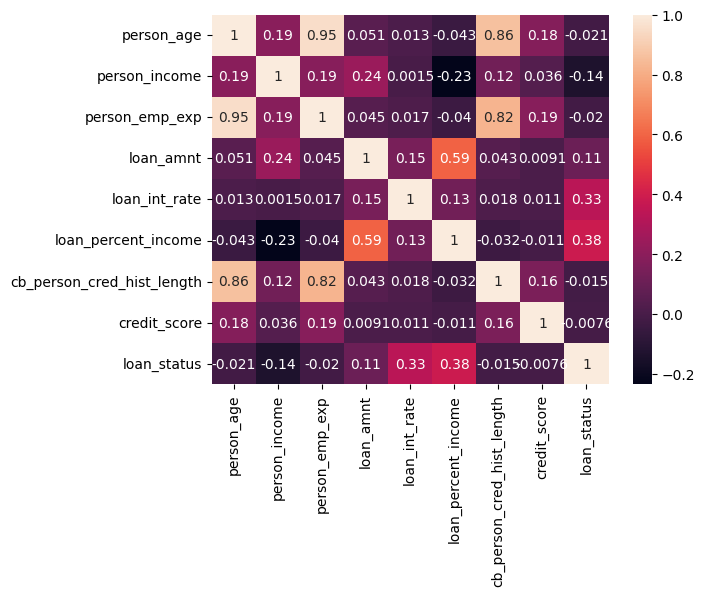

In [7]:
# print a plot of rectangular data as a color encoded matrix
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

## ***EDA AND INSIGHTS***

In [8]:
# person_gender value counts
gender=df['person_gender'].value_counts()
gender

,count
person_gender,
male,24841
female,20159


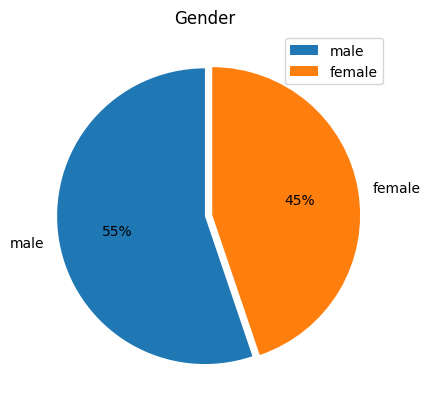

In [9]:
# print pie chart
plt.pie(gender.values,labels=gender.index,startangle=90,autopct='%0.0f%%',explode=[0,0.05])
plt.legend(labels=gender.index)
plt.title('Gender')
plt.show()

In [10]:
# print min,mean,max standerd deviation
df['person_age'].agg(['min','mean','max'])

,person_age
min,20.000000
mean,27.764178
max,144.000000


In [11]:
# person_education value counts
education=df['person_education'].value_counts()

In [12]:
education

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


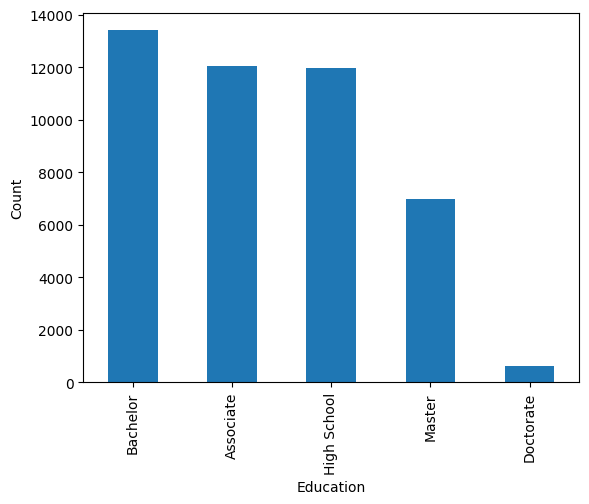

In [13]:
# print bar chart
education.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [14]:
# person_home_ownership value counts
owner=df['person_home_ownership'].value_counts()
owner

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


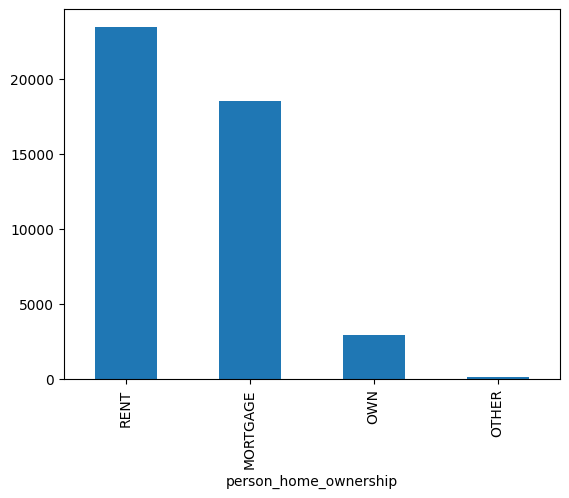

In [15]:
owner.plot(kind='bar')
plt.show()

In [16]:
# loan_intent valure count
loan_intent=df['loan_intent'].value_counts()
loan_intent

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


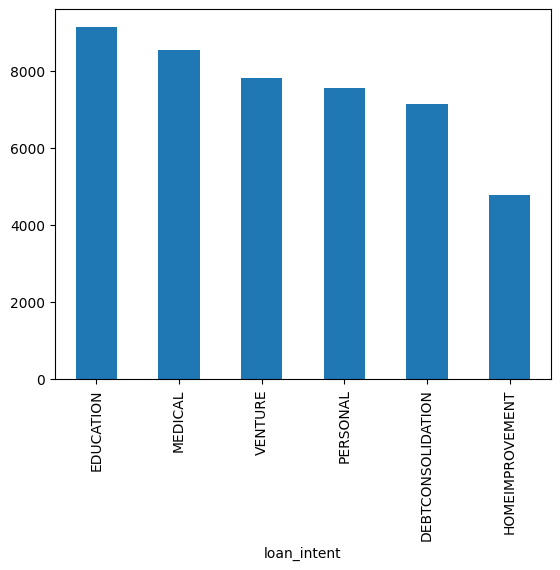

In [17]:
# print loan_intent bar plot
loan_intent.plot(kind='bar')
plt.show()

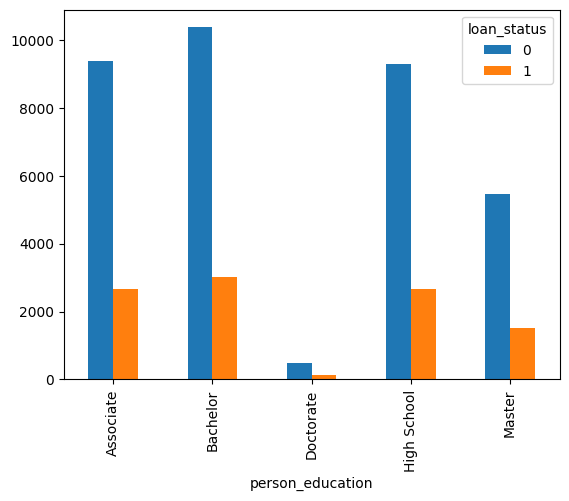

In [18]:
# compare the result for person_education and loan_status with value
pd.crosstab(df['person_education'],df['loan_status']).plot(kind='bar')
plt.show()

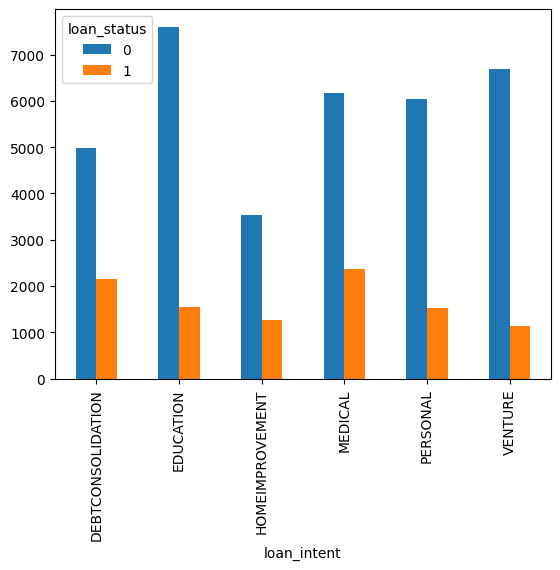

In [19]:
# display the relationship between loan_intent and loan_status using bar plot
pd.crosstab(df['loan_intent'],df['loan_status']).plot(kind='bar')
plt.show()

## ***Preprocessing***

In [20]:
# find the outlire in person_age
age_outlier=df[df['person_age']>94].index
age_outlier

Index([81, 183, 575, 747, 32297, 37930, 38113], dtype='int64')

In [21]:
# drop the outlier of person age
df.drop(age_outlier,axis=0,inplace=True)

In [22]:
# print the new data
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [23]:
# drop some columns
df.drop(columns=['person_age','cb_person_cred_hist_length','credit_score'],inplace=True)
df

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,No,1
1,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,Yes,0
2,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,No,1
3,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,No,1
4,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,No,1
...,...,...,...,...,...,...,...,...,...,...,...
44995,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,No,1
44996,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,No,1
44997,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,No,1
44998,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,No,1


## ***Encoding Categorical Columns***

In [24]:
# convert non-numerical data into a numerical format sutable for machine learning models
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [25]:
# normalize labels using labelEncoder()
le=LabelEncoder()

In [26]:
# fit and transform the categorical_columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [27]:
df

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,0,1
1,0,3,12282.0,0,2,1000.0,1,11.14,0.08,1,0
2,0,3,12438.0,3,0,5500.0,3,12.87,0.44,0,1
3,0,1,79753.0,0,3,35000.0,3,15.23,0.44,0,1
4,1,4,66135.0,1,3,35000.0,3,14.27,0.53,0,1
...,...,...,...,...,...,...,...,...,...,...,...
44995,1,0,47971.0,6,3,15000.0,3,15.66,0.31,0,1
44996,0,0,65800.0,17,3,9000.0,2,14.07,0.14,0,1
44997,1,0,56942.0,7,3,2771.0,0,10.02,0.05,0,1
44998,1,1,33164.0,4,3,12000.0,1,13.23,0.36,0,1


## ***Data partitioning***

In [28]:
x = df.drop(columns=['loan_status'])
y = df.loan_status

## ***Split Data***

In [29]:
# split a dataset into a training set and a testing set
xtrain ,xtest ,ytrain ,ytest = train_test_split(x ,y ,test_size= 0.8)

### ***Func To Evaluate***


In [30]:
def evaluation(test,pred):
    print(f'Accuracy Score : {accuracy_score(test,pred)}')
    cm=confusion_matrix(pred,test)
    sns.heatmap(cm,annot=True,fmt='d')

## ***Modeling***

***Logistic Regression***

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
ypred_lr=lr.predict(xtest)

Accuracy Score : 0.81972496180025


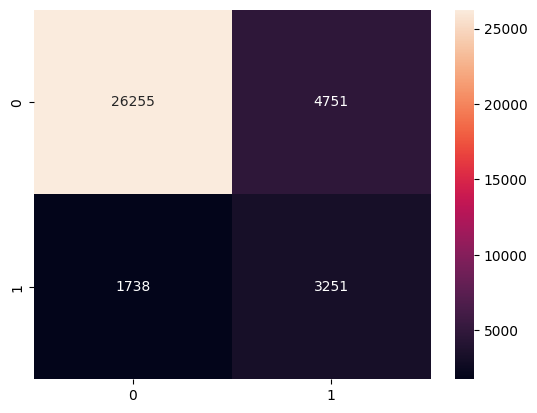

In [34]:
evaluation(ytest ,ypred_lr)

***Decision Tree***

In [35]:
dt=DecisionTreeClassifier()

In [36]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
ypred_dt=dt.predict(xtest)

Accuracy Score : 0.8881233504653424


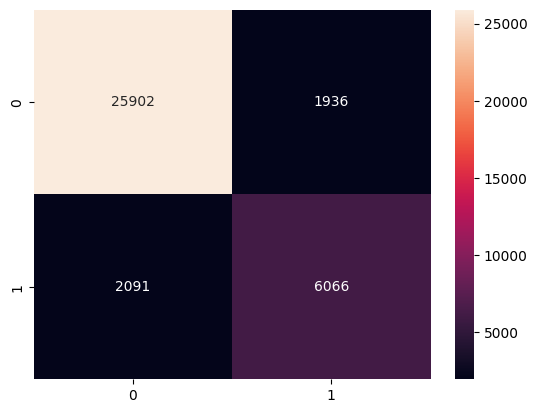

In [38]:
evaluation(ytest,ypred_dt)

***Random Forest***

In [39]:
rf=RandomForestClassifier(n_estimators=120)

In [40]:
rf.fit(xtrain ,ytrain)

RandomForestClassifier(n_estimators=120)

In [41]:
ypred_rf=rf.predict(xtest)

Accuracy Score : 0.9191276566189749


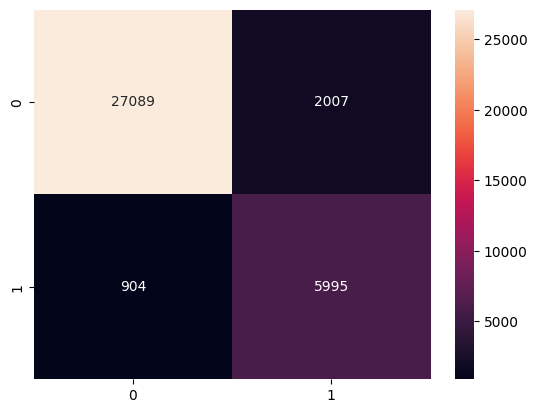

In [42]:
evaluation(ytest ,ypred_rf)

***SVM MODEL***

In [43]:
svm=SVC()

In [44]:
svm.fit(xtrain,ytrain)

SVC()

In [45]:
ypred_svm=svm.predict(xtest)

Accuracy Score : 0.8026114738158078


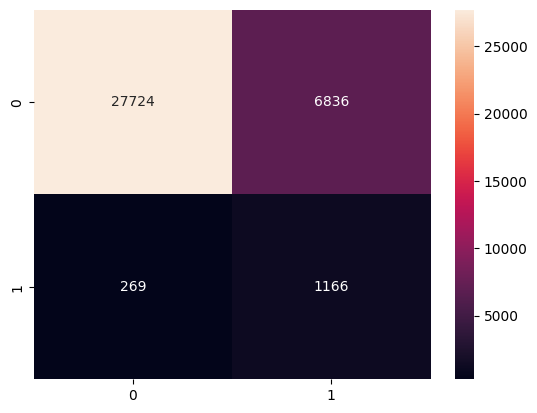

In [46]:
evaluation(ytest ,ypred_svm)

## ***Feature importances***


## **Decision Tree**


In [47]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y_pred_dt = dt.predict(xtest)
y_pred_proba_dt = dt.predict_proba(xtest)

In [48]:
dt_importances = pd.DataFrame({'Features':col,"Importance":dt.feature_importances_})
dt_importances_sorted = dt_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
dt_importances_sorted

,Features,Importance
0,previous_loan_defaults_on_file,0.296158
1,previous_loan_defaults_on_file,0.179378
2,previous_loan_defaults_on_file,0.177053
3,previous_loan_defaults_on_file,0.137706
4,previous_loan_defaults_on_file,0.051578
5,previous_loan_defaults_on_file,0.050296
6,previous_loan_defaults_on_file,0.041109
7,previous_loan_defaults_on_file,0.039468
8,previous_loan_defaults_on_file,0.016205
9,previous_loan_defaults_on_file,0.011050


In [49]:
rf_importances = pd.DataFrame({'Features':col,"Importance":rf.feature_importances_})
rf_importances_sorted = rf_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
rf_importances_sorted

,Features,Importance
0,previous_loan_defaults_on_file,0.224599
1,previous_loan_defaults_on_file,0.189538
2,previous_loan_defaults_on_file,0.170558
3,previous_loan_defaults_on_file,0.153148
4,previous_loan_defaults_on_file,0.072849
5,previous_loan_defaults_on_file,0.070820
6,previous_loan_defaults_on_file,0.043797
7,previous_loan_defaults_on_file,0.041319
8,previous_loan_defaults_on_file,0.022975
9,previous_loan_defaults_on_file,0.010398
